### STATS For Original Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
linked_suicide = pd.read_csv("linked_datasets_2022_2023/2022_2023_linked_suicide.csv")
linked_depression  = pd.read_csv("linked_datasets_2022_2023/2022_2023_linked_depression.csv")

/var/folders/3v/sfyw16_d61s8bzc_gdkq0d5h0000gn/T/ipykernel_71379/4271628363.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  linked_suicide = pd.read_csv("linked_datasets_2022_2023/2022_2023_linked_suicide.csv")
/var/folders/3v/sfyw16_d61s8bzc_gdkq0d5h0000gn/T/ipykernel_71379/4271628363.py:2: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  linked_depression  = pd.read_csv("linked_datasets_2022_2023/2022_2023_linked_depression.csv")


In [3]:
linked_suicide['score_submission'] = pd.to_numeric(linked_suicide['score_submission'], errors='coerce')
linked_suicide['score_comment'] = pd.to_numeric(linked_suicide['score_comment'], errors='coerce')

score_x_stats = {
    'count': linked_suicide['score_submission'].count(),
    'max': linked_suicide['score_submission'].max(),
    'min': linked_suicide['score_submission'].min(),
    'mean': linked_suicide['score_submission'].mean()
}

score_y_stats = {
    'count': linked_suicide['score_comment'].count(),
    'max': linked_suicide['score_comment'].max(),
    'min': linked_suicide['score_comment'].min(),
    'mean': linked_suicide['score_comment'].mean()
}

# Print the statistics
print("Statistics for SuicideWatch - submission votes:")
for stat, value in score_x_stats.items():
    print(f"{stat}: {value}")

print("\nStatistics for SuicideWatch - comment votes:")
for stat, value in score_y_stats.items():
    print(f"{stat}: {value}")

Statistics for SuicideWatch - submission votes:
count: 559483
max: 1806.0
min: 0.0
mean: 60.450228157066434

Statistics for SuicideWatch - comment votes:
count: 559481
max: 944.0
min: -302.0
mean: 3.0853880650102505


In [4]:
linked_depression['score_submission'] = pd.to_numeric(linked_depression['score_submission'], errors='coerce')
linked_depression['score_comment'] = pd.to_numeric(linked_depression['score_comment'], errors='coerce')

score_x_stats = {
    'count': linked_depression['score_submission'].count(),
    'max': linked_depression['score_submission'].max(),
    'min': linked_depression['score_submission'].min(),
    'mean': linked_depression['score_submission'].mean()
}

score_y_stats = {
    'count': linked_depression['score_comment'].count(),
    'max': linked_depression['score_comment'].max(),
    'min': linked_depression['score_comment'].min(),
    'mean': linked_depression['score_comment'].mean()
}

# Print the statistics
print("Statistics for Depression - submission votes:")
for stat, value in score_x_stats.items():
    print(f"{stat}: {value}")

print("\nStatistics for Depression - comment votes:")
for stat, value in score_y_stats.items():
    print(f"{stat}: {value}")

Statistics for Depression - submission votes:
count: 727988
max: 2141.0
min: 0.0
mean: 137.3002288499261

Statistics for Depression - comment votes:
count: 549784
max: 1225.0
min: -178.0
mean: 2.520680849206234


In [6]:
def count_submissions_and_comments(linked_data, subreddit_name):
    total_submissions = linked_data['thread_id'].nunique()
    total_comments = linked_data.shape[0]
   
    comments_per_submission = linked_data.groupby('thread_id')['score_comment'].count()

    plt.figure(figsize=(10, 6))
    ax = comments_per_submission.plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)

    # Add number notation above each bar
    for p in ax.patches:
        # Get the height (count) of each bar
        height = p.get_height()
        # Get the x position for the label
        x_position = p.get_x() + p.get_width() / 2
        # Place the label above the bar
        plt.text(x_position, height, str(int(height)), ha='center', va='bottom', fontsize=10)

    plt.title(f'Distribution of Comments per Submission in r/{subreddit_name}')
    plt.xlabel('Number of Comments per Submission')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    result = {
        'total_submissions': total_submissions,
        'total_comments': total_comments,
        'comments_per_submission': comments_per_submission
    }

    return result

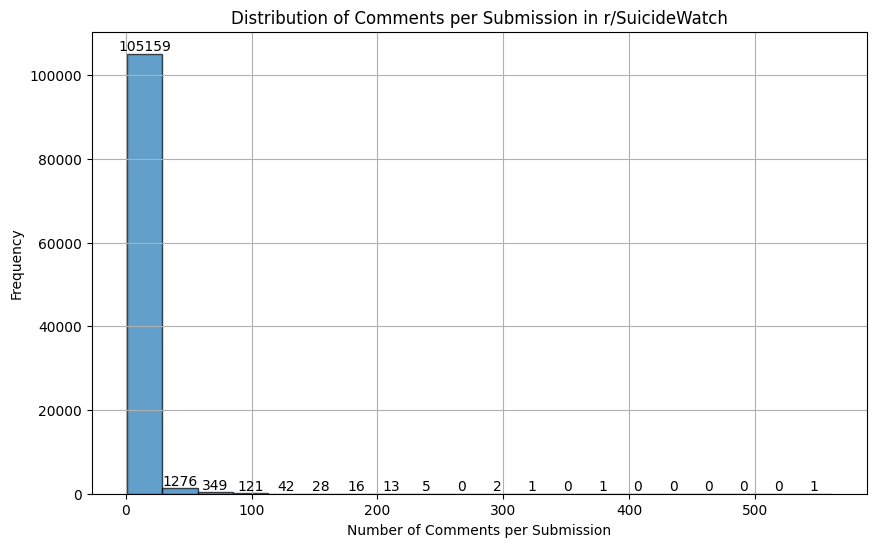

{'total_submissions': 107014,
 'total_comments': 559485,
 'comments_per_submission': thread_id
 10002bx    4
 10003aq    4
 1000b7k    2
 1000bej    1
 1000mbw    4
           ..
 zzz8f2     1
 zzz8yv     1
 zzzc45     1
 zzzmc1     7
 zzzo1g     1
 Name: score_comment, Length: 107014, dtype: int64}

In [7]:
count_submissions_and_comments(linked_suicide, 'SuicideWatch')

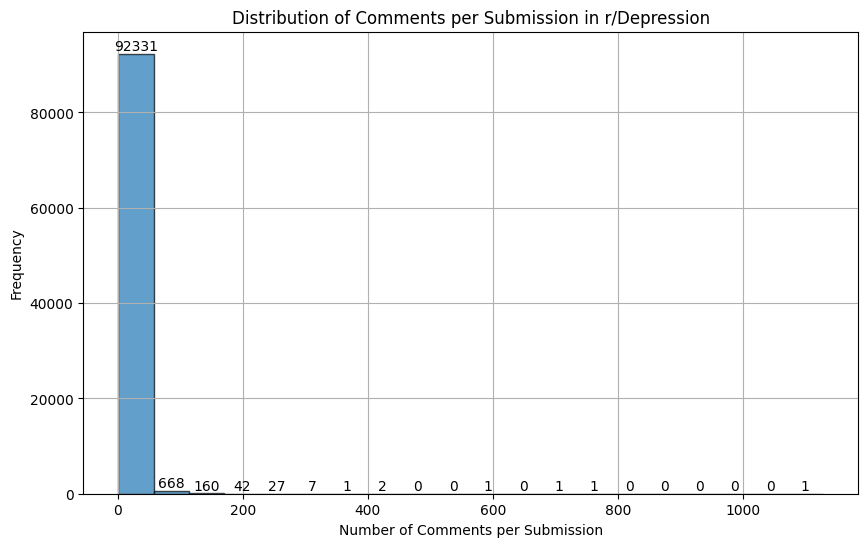

{'total_submissions': 93242,
 'total_comments': 812699,
 'comments_per_submission': thread_id
 1000e0k     1
 1000q96     3
 1000sky     1
 1001txh     3
 1001uhq     3
            ..
 zzz9wg      2
 zzzbv9      2
 zzzehn      3
 zzzjjn     71
 zzzpos     66
 Name: score_comment, Length: 93242, dtype: int64}

In [8]:
count_submissions_and_comments(linked_depression, 'Depression')